In [1]:
import pandas as pd
import numpy as np
import imblearn

In [4]:
data=pd.read_csv('/kaggle/input/imbalance-data/train.csv')
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


<Axes: xlabel='target', ylabel='count'>

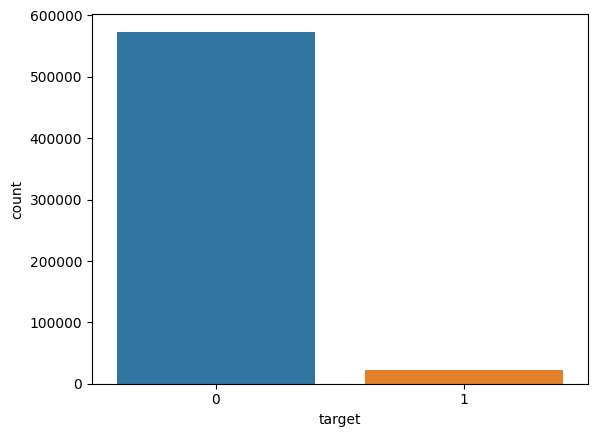

In [6]:
import seaborn as sns
sns.countplot(x='target',data=data)

In [8]:
data.groupby('target')['id'].count()/len(data)*100

target
0    96.355248
1     3.644752
Name: id, dtype: float64

In [9]:
x=data.iloc[:,2:]
y=data.target

In [13]:
np.shape(x)

(595212, 57)

In [14]:
np.shape(y)

(595212,)

In [16]:
cat_col=[i for i in range(0,len(x.columns)) if 'cat' in x.columns[i]]
cat_col

[1, 3, 4, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [20]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=100,learning_rate=0.1 , depth=6,
                        eval_metric='Accuracy')

In [21]:
model.fit(x_train,y_train,cat_col,eval_set=(x_test,y_test))

0:	learn: 0.9635446	test: 0.9635760	best: 0.9635760 (0)	total: 509ms	remaining: 50.3s
1:	learn: 0.9635446	test: 0.9635760	best: 0.9635760 (0)	total: 957ms	remaining: 46.9s
2:	learn: 0.9635446	test: 0.9635760	best: 0.9635760 (0)	total: 1.33s	remaining: 43.2s
3:	learn: 0.9635446	test: 0.9635760	best: 0.9635760 (0)	total: 1.78s	remaining: 42.7s
4:	learn: 0.9635446	test: 0.9635760	best: 0.9635760 (0)	total: 2.14s	remaining: 40.7s
5:	learn: 0.9635446	test: 0.9635760	best: 0.9635760 (0)	total: 2.52s	remaining: 39.6s
6:	learn: 0.9635446	test: 0.9635760	best: 0.9635760 (0)	total: 2.9s	remaining: 38.5s
7:	learn: 0.9635446	test: 0.9635760	best: 0.9635760 (0)	total: 3.27s	remaining: 37.6s
8:	learn: 0.9635446	test: 0.9635760	best: 0.9635760 (0)	total: 3.65s	remaining: 36.9s
9:	learn: 0.9635446	test: 0.9635760	best: 0.9635760 (0)	total: 4.05s	remaining: 36.4s
10:	learn: 0.9635446	test: 0.9635760	best: 0.9635760 (0)	total: 4.46s	remaining: 36.1s
11:	learn: 0.9635446	test: 0.9635760	best: 0.9635760 (

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
y_pred=model.predict(x_test)

In [26]:
confusion_matrix(y_test,y_pred)

array([[143383,      0],
       [  5420,      0]])

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143383
           1       0.00      0.00      0.00      5420

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.95    148803



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler()
x_rus,y_rus=rus.fit_resample(x_train,y_train)

In [36]:
model=CatBoostClassifier(iterations=300 , learning_rate=0.1 ,
                         depth=6 , eval_metric='Accuracy' , verbose=10)
model.fit(x_rus,y_rus,cat_col,eval_set=(x_test,y_test))

0:	learn: 0.5792983	test: 0.6124944	best: 0.6124944 (0)	total: 168ms	remaining: 50.1s
10:	learn: 0.5943530	test: 0.5986304	best: 0.6124944 (0)	total: 1.7s	remaining: 44.8s
20:	learn: 0.6012658	test: 0.5997997	best: 0.6124944 (0)	total: 3.13s	remaining: 41.5s
30:	learn: 0.6055979	test: 0.6020174	best: 0.6124944 (0)	total: 4.56s	remaining: 39.6s
40:	learn: 0.6079636	test: 0.5999812	best: 0.6124944 (0)	total: 6.04s	remaining: 38.2s
50:	learn: 0.6120806	test: 0.6025282	best: 0.6124944 (0)	total: 7.38s	remaining: 36s
60:	learn: 0.6148765	test: 0.6030322	best: 0.6124944 (0)	total: 8.78s	remaining: 34.4s
70:	learn: 0.6185941	test: 0.6001089	best: 0.6124944 (0)	total: 10.2s	remaining: 33s
80:	learn: 0.6210827	test: 0.5999274	best: 0.6124944 (0)	total: 11.6s	remaining: 31.2s
90:	learn: 0.6221273	test: 0.5996116	best: 0.6124944 (0)	total: 13s	remaining: 29.8s
100:	learn: 0.6246467	test: 0.6009287	best: 0.6124944 (0)	total: 14.9s	remaining: 29.4s
110:	learn: 0.6274425	test: 0.6022728	best: 0.6124

In [37]:
y_pred=model.predict(x_test)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.62      0.75    143383
           1       0.05      0.53      0.09      5420

    accuracy                           0.61    148803
   macro avg       0.51      0.57      0.42    148803
weighted avg       0.94      0.61      0.73    148803



In [39]:
confusion_matrix(y_test,y_pred)

array([[88274, 55109],
       [ 2553,  2867]])

In [40]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_ros,y_ros=ros.fit_resample(x_train,y_train)

In [41]:
np.shape(x)

(595212, 57)

In [42]:
np.unique(y_ros,return_counts=True)

(array([0, 1]), array([430135, 430135]))

In [43]:
model.fit(x_ros,y_ros,cat_col,eval_set=(x_test,y_test))

0:	learn: 0.5801388	test: 0.6245909	best: 0.6245909 (0)	total: 2.11s	remaining: 10m 31s
10:	learn: 0.5907610	test: 0.6111100	best: 0.6245909 (0)	total: 20.6s	remaining: 8m 59s
20:	learn: 0.6492450	test: 0.6491939	best: 0.6494493 (19)	total: 37.5s	remaining: 8m 18s
30:	learn: 0.6705372	test: 0.6612837	best: 0.6612837 (30)	total: 53s	remaining: 7m 40s
40:	learn: 0.6826450	test: 0.6712902	best: 0.6712902 (40)	total: 1m 9s	remaining: 7m 21s
50:	learn: 0.6915957	test: 0.6769218	best: 0.6769218 (50)	total: 1m 26s	remaining: 7m 1s
60:	learn: 0.6957641	test: 0.6790992	best: 0.6790992 (60)	total: 1m 43s	remaining: 6m 45s
70:	learn: 0.7032455	test: 0.6836152	best: 0.6847443 (68)	total: 2m	remaining: 6m 28s
80:	learn: 0.7091529	test: 0.6882321	best: 0.6882321 (80)	total: 2m 16s	remaining: 6m 9s
90:	learn: 0.7184349	test: 0.6946567	best: 0.6949255 (89)	total: 2m 33s	remaining: 5m 53s
100:	learn: 0.7230521	test: 0.6968811	best: 0.6968811 (100)	total: 2m 51s	remaining: 5m 37s
110:	learn: 0.7280958	t

In [45]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87    143383
           1       0.05      0.28      0.08      5420

    accuracy                           0.77    148803
   macro avg       0.51      0.54      0.48    148803
weighted avg       0.93      0.77      0.84    148803



In [46]:
confusion_matrix(y_test,y_pred)

array([[113631,  29752],
       [  3913,   1507]])

In [47]:
from imblearn.under_sampling import TomekLinks
tl=TomekLinks()
x_tl,y_tl=tl.fit_resample(x_train,y_train)

In [50]:
model.fit(x_tl,y_tl,cat_col,eval_set=(x_test,y_test))

0:	learn: 0.9631456	test: 0.9635760	best: 0.9635760 (0)	total: 999ms	remaining: 4m 58s
10:	learn: 0.9631456	test: 0.9635760	best: 0.9635760 (0)	total: 10.1s	remaining: 4m 25s
20:	learn: 0.9631456	test: 0.9635760	best: 0.9635760 (0)	total: 18.1s	remaining: 4m
30:	learn: 0.9631456	test: 0.9635760	best: 0.9635760 (0)	total: 25.9s	remaining: 3m 44s
40:	learn: 0.9631615	test: 0.9635760	best: 0.9635760 (0)	total: 35.1s	remaining: 3m 41s
50:	learn: 0.9631773	test: 0.9635693	best: 0.9635760 (0)	total: 43.6s	remaining: 3m 32s
60:	learn: 0.9631819	test: 0.9635760	best: 0.9635760 (0)	total: 53.5s	remaining: 3m 29s
70:	learn: 0.9631819	test: 0.9635760	best: 0.9635760 (0)	total: 1m 2s	remaining: 3m 20s
80:	learn: 0.9631909	test: 0.9635626	best: 0.9635760 (0)	total: 1m 11s	remaining: 3m 13s
90:	learn: 0.9631955	test: 0.9635626	best: 0.9635760 (0)	total: 1m 20s	remaining: 3m 6s
100:	learn: 0.9631932	test: 0.9635693	best: 0.9635760 (0)	total: 1m 28s	remaining: 2m 55s
110:	learn: 0.9631977	test: 0.9635

In [51]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143383
           1       0.57      0.00      0.00      5420

    accuracy                           0.96    148803
   macro avg       0.77      0.50      0.49    148803
weighted avg       0.95      0.96      0.95    148803



In [52]:
confusion_matrix(y_test,y_pred)

array([[143380,      3],
       [  5416,      4]])

In [55]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [58]:
np.unique(y_sm,return_counts=True)

(array([0, 1]), array([430135, 430135]))

In [59]:
model.fit(x_sm,y_sm,cat_col,eval_set=(x_test,y_test))

0:	learn: 0.7759517	test: 0.8064152	best: 0.8064152 (0)	total: 2.26s	remaining: 11m 15s
10:	learn: 0.9183198	test: 0.9251964	best: 0.9251964 (10)	total: 20.5s	remaining: 8m 57s
20:	learn: 0.9645321	test: 0.9562643	best: 0.9562643 (20)	total: 39s	remaining: 8m 38s
30:	learn: 0.9718565	test: 0.9618892	best: 0.9618892 (30)	total: 56.9s	remaining: 8m 13s
40:	learn: 0.9774315	test: 0.9631257	best: 0.9631257 (40)	total: 1m 15s	remaining: 7m 57s
50:	learn: 0.9785091	test: 0.9634080	best: 0.9634214 (49)	total: 1m 32s	remaining: 7m 33s
60:	learn: 0.9796308	test: 0.9634752	best: 0.9634752 (60)	total: 1m 51s	remaining: 7m 14s
70:	learn: 0.9801748	test: 0.9635155	best: 0.9635155 (70)	total: 2m 8s	remaining: 6m 53s
80:	learn: 0.9803829	test: 0.9635357	best: 0.9635357 (78)	total: 2m 25s	remaining: 6m 33s
90:	learn: 0.9805503	test: 0.9635424	best: 0.9635424 (89)	total: 2m 43s	remaining: 6m 14s
100:	learn: 0.9806235	test: 0.9635491	best: 0.9635491 (99)	total: 3m	remaining: 5m 55s
110:	learn: 0.9806317

In [60]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143383
           1       0.00      0.00      0.00      5420

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.95    148803



In [61]:
confusion_matrix(y_test,y_pred)

array([[143381,      2],
       [  5420,      0]])

In [64]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek()
x_smt,y_smt=smt.fit_resample(x_train,y_train)

In [65]:
model.fit(x_smt,y_smt,cat_col,eval_set=(x_test,y_test))

0:	learn: 0.7770293	test: 0.8064152	best: 0.8064152 (0)	total: 1.91s	remaining: 9m 30s
10:	learn: 0.9118091	test: 0.9246319	best: 0.9246319 (10)	total: 20.3s	remaining: 8m 52s
20:	learn: 0.9614819	test: 0.9511771	best: 0.9511771 (20)	total: 37.9s	remaining: 8m 23s
30:	learn: 0.9731398	test: 0.9610693	best: 0.9610693 (30)	total: 56.3s	remaining: 8m 8s
40:	learn: 0.9779139	test: 0.9629510	best: 0.9629510 (40)	total: 1m 14s	remaining: 7m 48s
50:	learn: 0.9794437	test: 0.9633542	best: 0.9633542 (50)	total: 1m 32s	remaining: 7m 30s
60:	learn: 0.9802039	test: 0.9634483	best: 0.9634483 (60)	total: 1m 50s	remaining: 7m 11s
70:	learn: 0.9803318	test: 0.9634819	best: 0.9634819 (67)	total: 2m 7s	remaining: 6m 50s
80:	learn: 0.9805224	test: 0.9635155	best: 0.9635155 (78)	total: 2m 25s	remaining: 6m 32s
90:	learn: 0.9805584	test: 0.9635155	best: 0.9635290 (82)	total: 2m 42s	remaining: 6m 13s
100:	learn: 0.9806096	test: 0.9635357	best: 0.9635357 (92)	total: 3m 1s	remaining: 5m 57s
110:	learn: 0.9806

In [66]:
y_pred=model.predict(x_test)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143383
           1       0.25      0.00      0.00      5420

    accuracy                           0.96    148803
   macro avg       0.61      0.50      0.49    148803
weighted avg       0.94      0.96      0.95    148803



In [69]:
confusion_matrix(y_test,y_pred)

array([[143380,      3],
       [  5419,      1]])